In [1]:
import numpy as np

def softmax(values):
    array_values = np.exp(values)
    return array_values / np.sum(array_values)

values = [2, 1, 5, 0.5]
y = softmax(values)
y.sum()

1.0

In [2]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digit_dataset['images'].shape

(1797, 8, 8)

In [4]:
digit_dataset['target'][0]

0

In [5]:
digit_dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

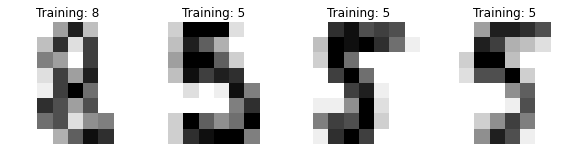

In [7]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax in axes:
    num = randint(1, 1000)
    image = digit_dataset['images'][num]
    label = digit_dataset['target'][num]
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [8]:
digit_dataset['data'][0].shape

(64,)

In [9]:
from sklearn.model_selection import train_test_split

X = digit_dataset['data']
y = digit_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Modelling

In [10]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class='ovr')
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogisticRegression(multi_class='multinomial', solver='sag')

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = logreg_ovr.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  1, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  3,  0,  0,  2,  0],
       [ 0,  2,  0,  0, 50,  0,  1,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 40]])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.89      0.93      0.91        42
           2       1.00      0.98      0.99        42
           3       1.00      0.89      0.94        47
           4       1.00      0.91      0.95        55
           5       0.92      1.00      0.96        48
           6       0.98      1.00      0.99        42
           7       0.96      0.96      0.96        47
           8       0.83      0.95      0.88        40
           9       0.98      0.93      0.95        43

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.95      0.95       450



In [15]:
result = confusion_matrix(y_true, y_pred)
result.diagonal().sum() / result.sum(axis=0).sum()

0.9533333333333334

In [16]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average='micro')

0.9533333333333334

In [17]:
precision_score(y_true, y_pred, average='macro')

0.9545328266617009

In [18]:
precision_score(y_true, y_pred, average=None)

array([1.        , 0.88636364, 1.        , 1.        , 1.        ,
       0.92307692, 0.97674419, 0.95744681, 0.82608696, 0.97560976])

## 3. ROC Curve and AUC

In [19]:
import numpy as np
from sklearn import metrics

y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

In [20]:
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, threshold = metrics.roc_curve(y, pred, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.75

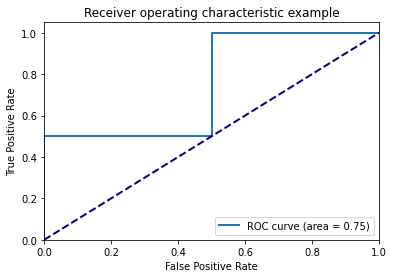

In [21]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, 
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()